## Exploring the relationship between cardiac disease, body measurements, blood markers, and lifestyle choices.

In [2]:
import os
os.chdir("C:/Users/Muskan/Downloads/freecodecamp_projects")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("medical_examination.csv")

#df.head()

Categorizing in Overwight or not

In [3]:
# Add 'overweight' column
#calculate BMI by dividing their weight in kilograms by the square of their height in meters.

#Given height is in cms by looking at data converting in meters by dividing value by 10

BMI=df['weight']/np.square(df['height']/100)

#BMI>25 is overweight represented by '1' and Not overweight represented by '0'

df['overweight'] = BMI.apply(lambda x:1 if x>25 else 0)
#df.head()

In [4]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.

df['cholesterol']=df['cholesterol'].apply(lambda x:0 if x==1 else 1)
df['gluc']=df['gluc'].apply(lambda x: 0 if x==1 else 1)

   cardio variable  value
0       0     alco      0
1       1     alco      0
2       1     alco      0
3       1     alco      0
4       0     alco      0
        cardio variable  value
419995       0    smoke      1
419996       1    smoke      0
419997       1    smoke      0
419998       1    smoke      0
419999       0    smoke      0
   cardio     variable  value  total
0       0       active      0   6378
1       0       active      1  28643
2       0         alco      0  33080
3       0         alco      1   1941
4       0  cholesterol      0  29330


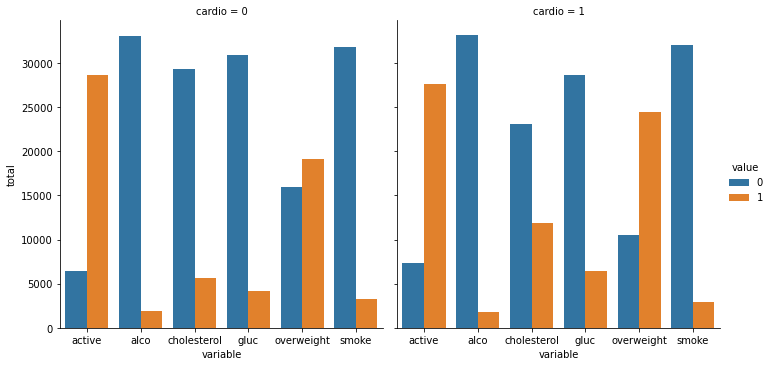

In [10]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars = 'cardio', var_name = 'variable', value_vars = ['alco', 'active','cholesterol', 'gluc', 'overweight','smoke'])

    #pd.melt will put all categories except for cardio in one column and their corresponsing 1s or 0s in another column
    
    print(df_cat.head(5))
    print(df_cat.tail(5))
    
    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
# Since pd.melt() changed the dataframe to 3 columns Cardio, Variable and Value we will have to have a column 'Total' for the total count of each category
    
    df_cat['total']=1
    df_cat = df_cat.groupby(["cardio","variable","value"],as_index=False).count()
    print(df_cat.head())
    #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby
    
    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x='variable',y='total',data=df_cat,hue="value",kind='bar',col="cardio").set_axis_labels("variable", "total")
    fig = fig.fig
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

#https://seaborn.pydata.org/tutorial/categorical.html

    # Do not modify the next two lines
    fig.savefig('catplot.png')
draw_cat_plot()

Finding Correlation

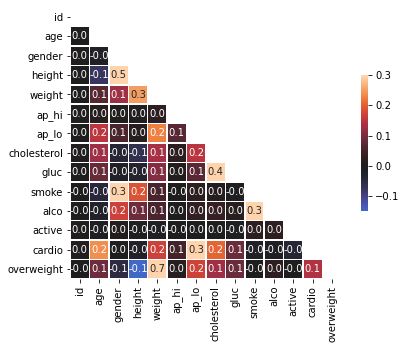

In [9]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = df[(df['ap_lo']<=df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025))&
    (df['height'] <= df['height'].quantile(0.975))&
    (df['weight'] >= df['weight'].quantile(0.025))&
    (df['weight'] <= df['weight'].quantile(0.975))
    ]

    # Calculate the correlation matrix
    corr = df_heat.corr()
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html?highlight=corr#pandas.DataFrame.corr

    # Generate a mask for the upper triangle
   
    mask = np.triu(corr)
    #https://numpy.org/doc/stable/reference/generated/numpy.triu.html

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(7, 5))
    #https://matplotlib.org/stable/tutorials/introductory/usage.html
    

    # Draw the heatmap with 'sns.heatmap()'
    sns.heatmap(corr,mask=mask, fmt='.1f',vmax=.3, linewidths=.5,square=True, cbar_kws = {'shrink':0.5},annot=True, center=0)
  

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
draw_heat_map()
